In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
X = df.loc[:, df.columns != 'label'].to_numpy()
y = df['label'].to_numpy()

In [5]:
X = X.reshape(42000, 28, 28)
X = X.reshape(42000, 28, 28)

In [6]:
X = X / 255.0

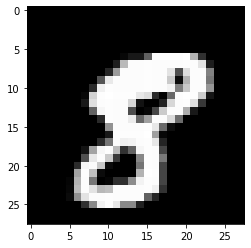

In [7]:
plt.imshow(X[10], cmap = 'gray')

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [9]:
x_test, x_dev, y_test, y_dev = train_test_split(x_test, y_test, test_size = 0.5)

In [10]:
model = Sequential([
    Conv2D(6, (5, 5), activation = "relu", input_shape = (28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(16, (5, 5), activation = "relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(120, activation = "relu"),
    Dense(84, activation = "relu"),
    Dense(10, activation = "linear")
], name = 'my_model')

In [11]:
model.compile('adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy']
             )

In [12]:
model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
919/919 [==============================] - 35s 10ms/step - loss: 0.2878 - accuracy: 0.9147 - val_loss: 0.1081 - val_accuracy: 0.9663
Epoch 2/10
919/919 [==============================] - 6s 6ms/step - loss: 0.0908 - accuracy: 0.9719 - val_loss: 0.0688 - val_accuracy: 0.9792
Epoch 3/10
919/919 [==============================] - 6s 7ms/step - loss: 0.0625 - accuracy: 0.9811 - val_loss: 0.0606 - val_accuracy: 0.9800
Epoch 4/10
919/919 [==============================] - 6s 6ms/step - loss: 0.0453 - accuracy: 0.9851 - val_loss: 0.0707 - val_accuracy: 0.9778
Epoch 5/10
919/919 [==============================] - 6s 6ms/step - loss: 0.0375 - accuracy: 0.9875 - val_loss: 0.0536 - val_accuracy: 0.9844
Epoch 6/10
919/919 [==============================] - 6s 6ms/step - loss: 0.0299 - accuracy: 0.9903 - val_loss: 0.0496 - val_accuracy: 0.9867
Epoch 7/10
919/919 [==============================] - 6s 6ms/step - loss: 0.0281 - accuracy: 0.9904 - val_loss: 0.0513 - val_accuracy: 0.9849
Epoc

In [13]:
import os
model.save(os.path.join('models', 'DigitRecognizer.h5'))

In [14]:
logits = model.predict(x_dev)
y_dev_pred = tf.nn.softmax(logits)

197/197 [==============================] - 1s 3ms/step


In [15]:
y_dev_pred = np.argmax(y_dev_pred, axis = 1)

In [16]:
accuracy_score(y_dev, y_dev_pred)

0.9806349206349206

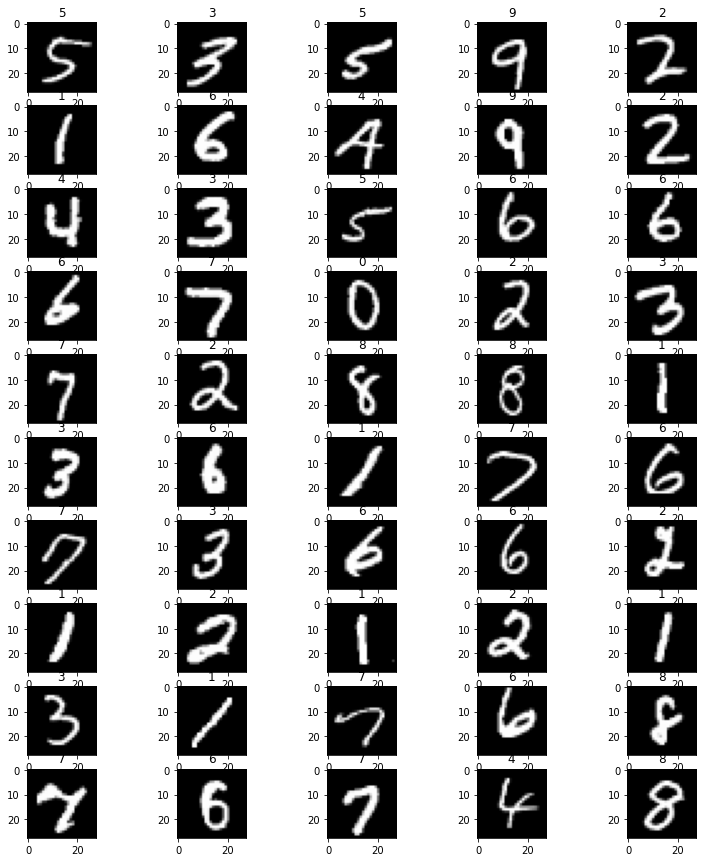

In [17]:
fig, axis = plt.subplots(10, 5, figsize = (13, 15))
axis = axis.flatten()
for i in range(len(axis)):
    axis[i].imshow(x_dev[i], cmap = 'gray')
    axis[i].title.set_xlabel(y_dev_pred[i])

plt.show()

# Test

In [60]:
test_df = pd.read_csv('test.csv')

In [61]:
test_X = test_df.to_numpy()

In [62]:
test_X.shape

(28000, 784)

In [63]:
test_X = test_X.reshape(28000, 28, 28)
test_X = test_X.reshape(28000, 28, 28)

In [64]:
test_X.shape

(28000, 28, 28)

In [65]:
test_X = test_X / 255.0

In [66]:
logits = model(test_X)
test_y_pred = tf.nn.softmax(logits)
test_y_pred = np.argmax(test_y_pred, axis = 1)

In [67]:
test_y_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

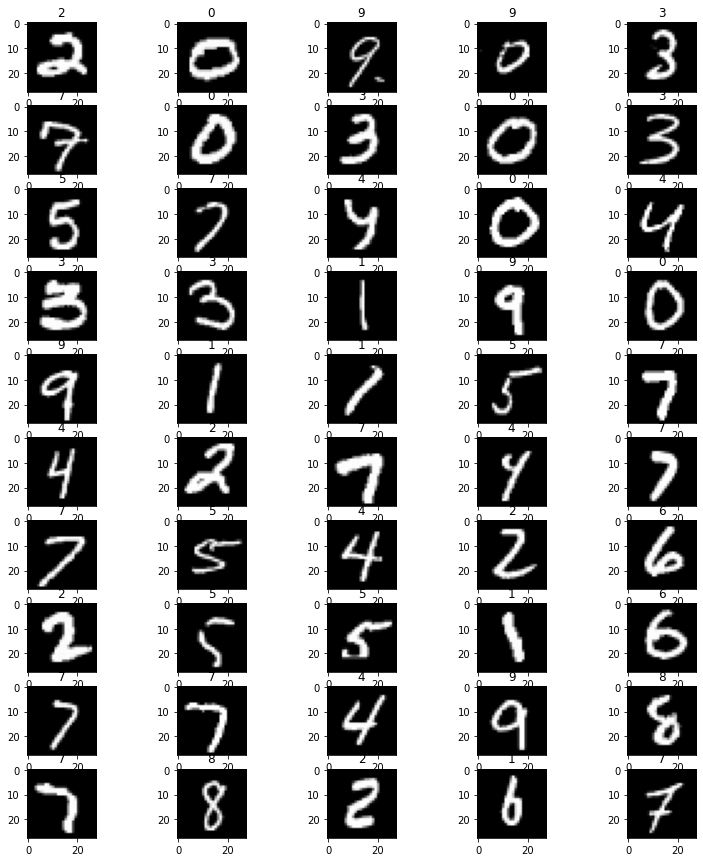

In [68]:
fig, axis = plt.subplots(10, 5, figsize = (13, 15))
axis = axis.flatten()
for i in range(len(axis)):
    axis[i].imshow(test_X[i], cmap = 'gray')
    axis[i].set_title(test_y_pred[i])

plt.show()

In [25]:
submission_df = pd.DataFrame({"Label" : test_y_pred})

In [26]:
submission_df.index += 1
submission_df.index.name = 'ImageId'

In [27]:
submission_df

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3
...,...
27996,9
27997,7
27998,3


In [28]:
submission_df.to_csv("submission.csv")